# Linear Regression



### Generate random Data

We generate data with a standard deviation of one sigma of (2,3) times the x = (x1,x2) value.



In [2]:
import numpy as np
# Generate random input data
x = np.random.randn(100, 2)
y = np.dot(x, np.array([[2], [3]])) + np.random.normal(0, 1, size=(100, 1))

### Visualize Data



Fontconfig warning: ignoring UTF-8: not a valid region tag


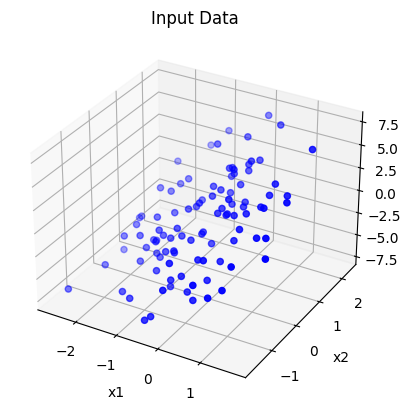

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the x1, x2, and y coordinates for plotting
x1 = x[:, 0]
x2 = x[:, 1]

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(x1, x2, y, c='b', marker='o')

# Set labels for the axes
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

# Set title for the plot
ax.set_title('Input Data')

# Show the 3D plot
plt.show()

### Perform Linear Regression (least squares with gradient descent)

What this does, is that we minimize the squared error (loss) by taking small steps in the 'right' direction. This direction can be computed via the gradient of the squared error.



In [5]:
def linear_regression(x, y, learning_rate=0.0005, num_iterations=3000):
    # Initialize parameters 
    As = list()
    bs = list()
    A = np.zeros((x.shape[1], y.shape[1]))  # Slope matrix
    b = np.zeros((1, y.shape[1]))  # Intercept vector
    
    # Number of training examples
    m = len(x)
    
    for i in range(num_iterations):
        # Calculate predicted values
        y_pred = np.dot(x, A) + b
        
        # Calculate gradients - least squares
        gradient_A = (2/m) * np.dot(x.T, y_pred - y)
        gradient_b = (2/m) * np.sum(y_pred - y, axis=0, keepdims=True)
        
        # Update parameters using gradient descent
        A -= learning_rate * gradient_A
        b -= learning_rate * gradient_b
        
        # Print the loss every 100 iterations
        if i % 300 == 0:
            loss = np.mean((y_pred - y) ** 2)
            print(f"Iteration {i}: Loss = {loss}")
            As.append(A.copy())
            bs.append(b.copy())
    
    return A, b, As, bs



# Perform linear regression
A, b, As, bs = linear_regression(x, y)

# Print the parameters
print("Slope Matrix A:")
print(A)
print("\nIntercept Vector b:")
print(b)
del A,b

Iteration 0: Loss = 11.507518899226502
Iteration 300: Loss = 7.234321531603185
Iteration 600: Loss = 4.711153457825117
Iteration 900: Loss = 3.2052898246201607
Iteration 1200: Loss = 2.2989261401850736
Iteration 1500: Loss = 1.7497889580272679
Iteration 1800: Loss = 1.4153963677379462
Iteration 2100: Loss = 1.210985949859104
Iteration 2400: Loss = 1.0856689676288243
Iteration 2700: Loss = 1.0086739316473896
Slope Matrix A:
[[1.80530904]
 [2.70331527]]

Intercept Vector b:
[[-0.06768084]]


### Plot the results



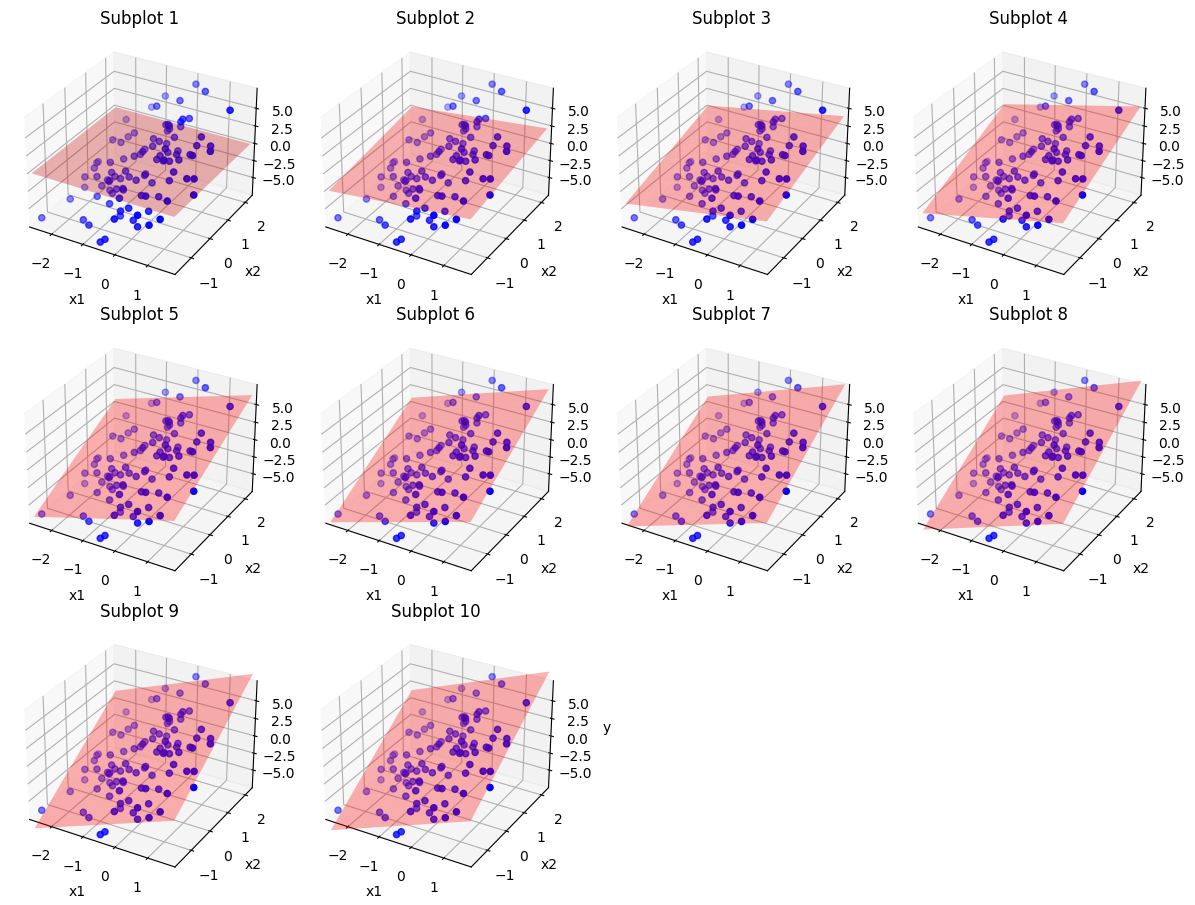

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the x1, x2, and y coordinates for plotting
x1 = x[:, 0]
x2 = x[:, 1]

# Determine the grid size
num_plots = len(As)
grid_size = int(np.ceil(np.sqrt(num_plots)))

# Create a grid of subplots
fig, axs = plt.subplots(grid_size, grid_size, figsize=(12, 12), subplot_kw={'projection': '3d'})

# Iterate over the parameters and create subplots
for i, (A, b) in enumerate(zip(As, bs)):
    # Plot the data points
    ax = axs[i // grid_size, i % grid_size]
    ax.scatter(x[:, 0], x[:, 1], y.flatten(), c='b', marker='o')

    # Plot the plane defined by A and b
    x1_plane, x2_plane = np.meshgrid(np.linspace(min(x[:, 0]), max(x[:, 0]), 10), np.linspace(min(x[:, 1]), max(x[:, 1]), 10))
    y_plane = A[0] * x1_plane + A[1] * x2_plane + b
    ax.plot_surface(x1_plane, x2_plane, y_plane, alpha=0.3, color='r')

    # Set labels for the axes
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

    # Set title for the subplot
    ax.set_title(f'Subplot {i+1}')

    # Set axis limits
    ax.set_xlim(min(x[:, 0]), max(x[:, 0]))
    ax.set_ylim(min(x[:, 1]), max(x[:, 1]))
    ax.set_zlim(min(y.flatten()), max(y.flatten()))

    # Enable grid lines
    ax.grid(True)

# Remove any unused subplots
for i in range(num_plots, grid_size ** 2):
    fig.delaxes(axs[i // grid_size, i % grid_size])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot grid
plt.show()